In [3]:

from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

In [4]:
#define state
#reducer function

from langgraph.graph.message import add_messages

class ChatState(TypedDict):

    messages: Annotated[list[BaseMessage], add_messages] 
    #BaseMessage to store all type of messages, User, AI, System, tool   and add_messages reducer to add all the messages

In [5]:
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash-lite")

def chat_node(state: ChatState):

    #take user query
    messages = state['messages']

    #send to llm
    response = llm.invoke(messages)

    #response store state
    return {'messages': [response]}

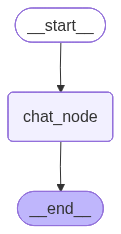

In [7]:
graph = StateGraph(ChatState)

#add nodes
graph.add_node('chat_node', chat_node)


#add edges
graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

chatbot = graph.compile()

chatbot

In [11]:
initial_state = {
    'messages':[HumanMessage(content='what is the capital of india?')]
}

chatbot.invoke(initial_state)['messages'][-1].content

'The capital of India is **New Delhi**.'

In [12]:
while True:
    user_message = input('type here: ')
    print('user:', user_message)

    if user_message.strip().lower() in ['exit', 'quit', 'bye']:
        break
    response = chatbot.invoke({'messages':[HumanMessage(content=user_message)]})

    print('AI:', response['messages'][-1].content)

user: hi
AI: Hi there! How can I help you today?
user: what is the capital of india
AI: The capital of India is **New Delhi**.
user: okay, what is the capital of spain?
AI: The capital of Spain is **Madrid**.
user: good, thanks
AI: You're welcome! I'm glad I could help.

If you have any more questions or need anything else, just let me know. I'm here to assist you.
user: what is quantum mechanics
AI: Quantum mechanics is a fundamental theory in physics that describes the physical properties of nature at the scale of atoms and subatomic particles. It's a bizarre and counter-intuitive realm that governs how things behave at the smallest possible levels, and it's responsible for many of the technologies we rely on today.

Here's a breakdown of its core ideas and why it's so important:

**Key Concepts of Quantum Mechanics:**

*   **Quantization:** This is where the name "quantum" comes from. Many physical properties, like energy, momentum, and angular momentum, are not continuous but come 

In [13]:
while True:
    user_message = input('type here: ')
    print('user:', user_message)

    if user_message.strip().lower() in ['exit', 'quit', 'bye']:
        break
    response = chatbot.invoke({'messages':[HumanMessage(content=user_message)]})

    print('AI:', response['messages'][-1].content)

user: hi
AI: Hi there! How can I help you today?
user: my name is deepak
AI: Hello Deepak! It's nice to meet you. How can I help you today?
user: tell me my name
AI: I do not have access to any personal information about you, including your name. I am a large language model, trained by Google.
user: i am 30 year old
AI: That's a great age! Thirty is often seen as a significant milestone, a point where many people feel a sense of established adulthood while still having plenty of life ahead of them.

What are your thoughts or feelings about being 30? Is there anything in particular you'd like to discuss or know related to this age? For example, are you thinking about:

*   **Career goals?**
*   **Personal development?**
*   **Relationships?**
*   **Health and well-being?**
*   **Financial planning?**
*   **Just reflecting on life?**

I'm here to chat about whatever is on your mind!
user: what is my age
AI: I cannot know your age. I am a large language model, an AI, and I do not have acc